<a href="https://colab.research.google.com/github/ydvshalu001/Gold_Price_Prediction/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
df = pd.read_csv('gld_price_data.csv')

In [20]:
df.head(8)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006


In [21]:
df.tail(9)

,Date,SPX,GLD,USO,SLV,EUR/USD
2281,5/1/2018,2654.800049,123.709999,13.6100,15.2400,1.199156
2282,5/2/2018,2635.669922,123.650002,13.6700,15.4200,1.195100
2283,5/3/2018,2629.729980,124.279999,13.8200,15.4600,1.198926
2284,5/7/2018,2672.629883,124.570000,14.1000,15.5200,1.193374
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [23]:
df.shape

(2290, 6)

In [25]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [26]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [27]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
df = df.drop('Date',axis=1)

In [30]:
X = df.drop('GLD',axis=1)
y = df['GLD']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

R2 Score: 0.8975640982991402
MSE: 56.165594215005996


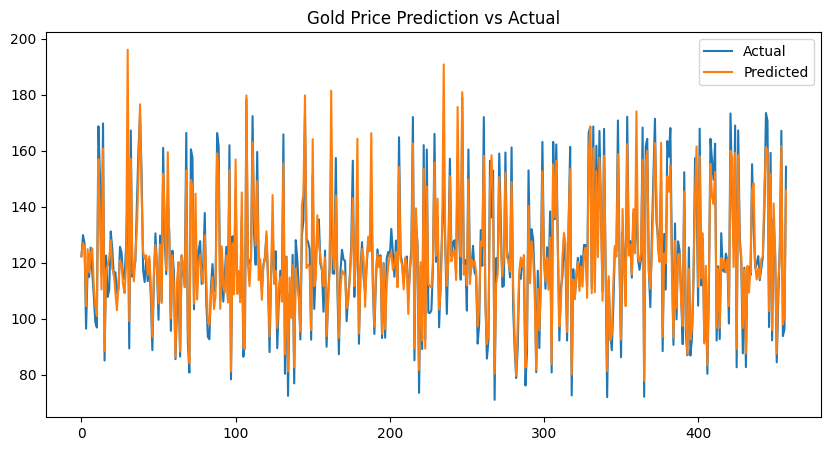

In [34]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Gold Price Prediction vs Actual")
plt.show()

In [35]:
import gradio as gr

def predict_gold(spx, uso, slv, eurusd):
    input_data = np.array([[spx, uso, slv, eurusd]])
    prediction = model.predict(input_data)
    return round(prediction[0], 2)

interface = gr.Interface(fn=predict_gold,
                         inputs=["number", "number", "number", "number"],
                         outputs="number",
                         title="Gold Price Predictor",
                         description="Enter SPX, USO, SLV, EUR/USD to predict Gold Price.")

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d25fe2274b4846fe5d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
